(2000, 256) (2000,)


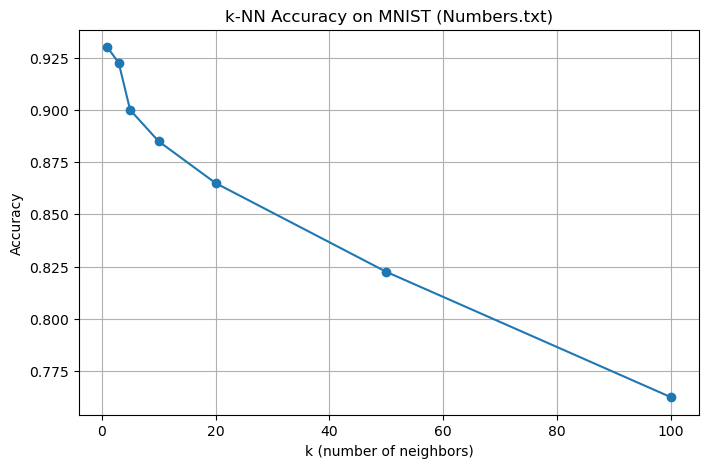

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


MNIST = pd.read_csv('Numbers.txt', delim_whitespace=True) #read the data from  Numbers.txt as a csv file

y = MNIST.iloc[:, 0].values
X = MNIST.iloc[:, 1:].values

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k_values = [1, 3, 5, 10, 20, 50, 100]
accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)


plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy, marker='o')
plt.title("k-NN Accuracy on MNIST")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()



Nested CV Accuracy for k-NN:
Mean accuracy: 0.9335
Standard deviation: 0.0054


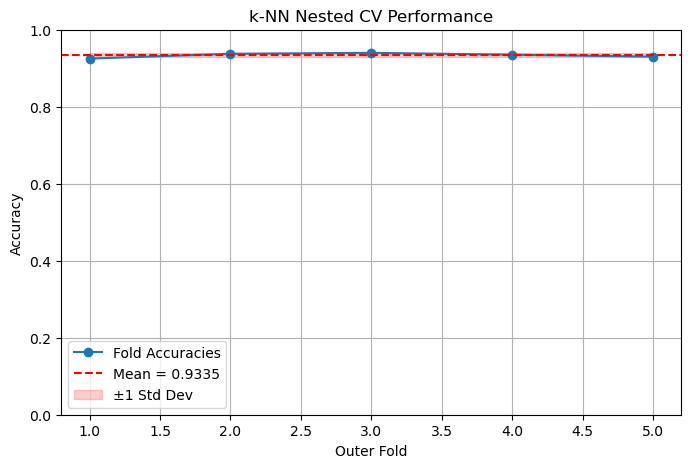

In [16]:

y = MNIST.iloc[:, 0].values
X = MNIST.iloc[:, 1:].values

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 3, 5, 10, 20, 50, 100],
    'weights': ['uniform', 'distance'],
}

outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(knn, param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)

nested_scores = cross_val_score(grid_search, X, y, cv=outer_cv, scoring='accuracy', n_jobs=-1)

print("Nested CV Accuracy for k-NN:")
print(f"Mean accuracy: {nested_scores.mean():.4f}")
print(f"Standard deviation: {nested_scores.std():.4f}")

mean_acc = nested_scores.mean()
std_acc = nested_scores.std()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(nested_scores)+1), nested_scores, marker='o', linestyle='-', label='Fold Accuracies')
plt.axhline(mean_acc, color='red', linestyle='--', label=f"Mean = {mean_acc:.4f}")
plt.fill_between(range(1, len(nested_scores)+1),
                 mean_acc - std_acc, mean_acc + std_acc,
                 color='red', alpha=0.2, label="±1 Std Dev")
plt.ylim(0, 1)
plt.xlabel("Outer Fold")
plt.ylabel("Accuracy")
plt.title("k-NN Nested CV Performance")
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
MNIST = pd.read_csv('Numbers.txt', delim_whitespace=True)

y = MNIST.iloc[:, 0].values
X = MNIST.iloc[:, 1:].values

print("Original data shape:", X.shape, y.shape)

# Split dataset
X_train_orig, X_test, y_train_orig, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mislabeling rates and k values
mislabel_rates = np.arange(0.1, 1.0, 0.1)
k_values = [1, 3, 5, 10, 20, 50, 100]

# Dictionary to store accuracy results
results = {k: [] for k in k_values}

for rate in mislabel_rates:
    # Mislabel the training labels
    np.random.seed(42)
    y_train_noisy = y_train_orig.copy()
    num_mislabel = int(len(y_train_noisy) * rate)
    indices_to_mislabel = np.random.choice(len(y_train_noisy), num_mislabel, replace=False)

    for idx in indices_to_mislabel:
        original_label = y_train_noisy[idx]
        possible_labels = [l for l in np.unique(y_train_noisy) if l != original_label]
        y_train_noisy[idx] = np.random.choice(possible_labels)

    # Loop through each k value
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_orig, y_train_noisy)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[k].append(acc)

# Plotting
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot(mislabel_rates, results[k], marker='o', label=f'k={k}')

plt.title("k-NN Accuracy vs Mislabeling Rate")
plt.xlabel("Mislabeling Rate")
plt.ylabel("Accuracy")
plt.legend(title="k value")
plt.grid(True)
plt.tight_layout()
plt.show()